In [17]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [18]:
n = 4

circuit = QuantumCircuit(n)

In [19]:
def initalize_s(qc, qubits):
    for q in qubits:
        circuit.h(q)

In [20]:
qubits = list(range(n))
initalize_s(circuit, qubits)

In [21]:
circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     └───┘

In [22]:
def oracle(qc, n):
    qc.mct([0, 2], n-1)

def multicontrolled_z(qc, n):
    qc.h(n-1)
    qc.mct(list(range(n-1)), n-1)
    qc.h(n-1)

def diffuser(qc, n):
    for qubit in range(n):
        qc.h(qubit)
        qc.x(qubit)

    multicontrolled_z(qc, n)

    for qubit in range(n):
        qc.x(qubit)
        qc.h(qubit)

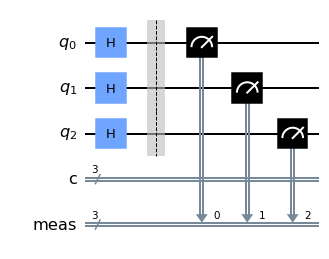

In [23]:
circuit = QuantumCircuit(3, 3)

for i in range(3):
    circuit.h(i)

circuit.measure_all()

circuit.draw(output='mpl')

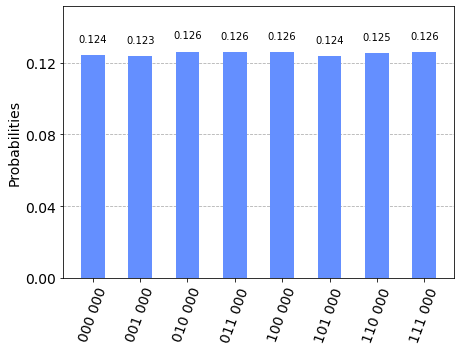

In [24]:
simulator = Aer.get_backend('aer_simulator')
results = execute(circuit, backend=simulator, shots=100000).result()
counts = results.get_counts()
plot_histogram(counts)

In [27]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

circuit.draw()

┌───┐ ░ ┌─┐      
q_0: ┤ H ├─░─┤M├──────
     ├───┤ ░ └╥┘┌─┐   
q_1: ┤ H ├─░──╫─┤M├───
     ├───┤ ░  ║ └╥┘┌─┐
q_2: ┤ H ├─░──╫──╫─┤M├
     └───┘ ░  ║  ║ └╥┘
c: 3/═════════╩══╩══╩═
              0  1  2

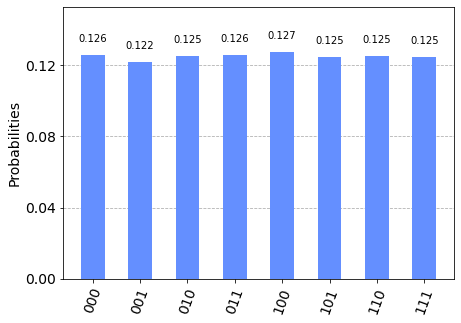

In [26]:
simulator = Aer.get_backend('aer_simulator')
results = execute(circuit, backend=simulator, shots=100000).result()
counts = results.get_counts()
plot_histogram(counts)

In [37]:
from qiskit.circuit.library import PhaseOracle

circuit = QuantumCircuit(4, 4)

for i in range(3):
    circuit.h(i)

ora = PhaseOracle("x & ~y & z")
ora.draw()


q_0: ─■─
      │ 
q_1: ─o─
      │ 
q_2: ─■─